In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
     

In [2]:
df= pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
print("📌 SHAPE BEFORE DROPPING:", df.shape)

print("\n📌 BASIC INFO BEFORE DROPPING")
print(df.info())

print("\n📌 DESCRIPTIVE STATISTICS BEFORE DROPPING")
print(df.describe())

📌 SHAPE BEFORE DROPPING: (731, 16)

📌 BASIC INFO BEFORE DROPPING
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

📌 DESCRIPTIVE STATISTI

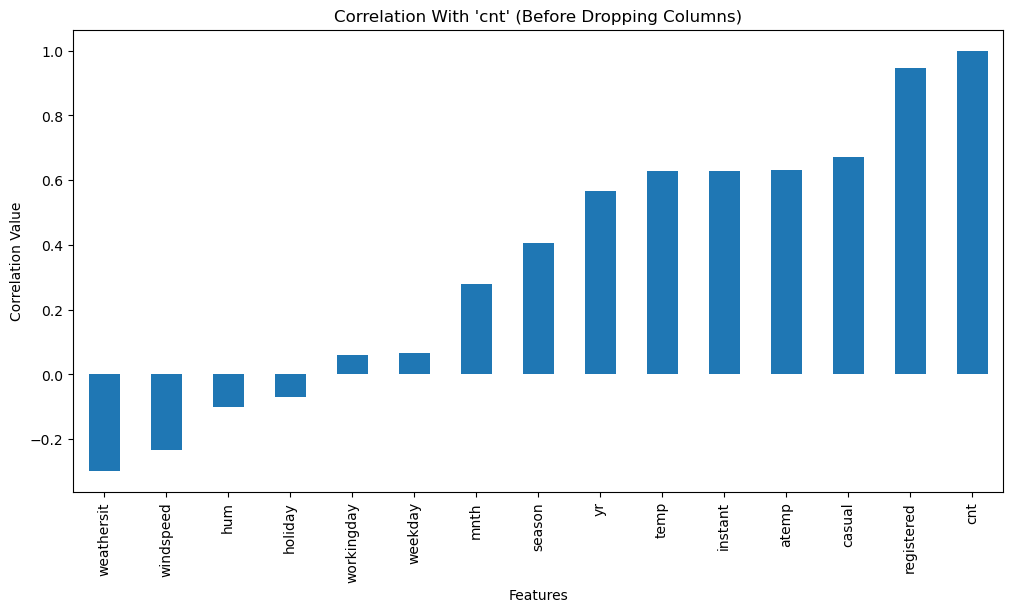

In [5]:
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()['cnt'].sort_values().plot(kind='bar')
plt.title("Correlation With 'cnt' (Before Dropping Columns)")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.show()

In [6]:
columns_to_drop = ['instant','dteday',  'yr',  'casual', 'registered']

In [7]:
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print(" Columns dropped successfully!")
df.head()

 Columns dropped successfully!


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [8]:
columns_to_drop = [c for c in columns_to_drop if c in df.columns]

In [9]:
df_dropped = df.drop(columns=columns_to_drop)

In [10]:
print("\n\n📌 SHAPE AFTER DROPPING:", df_dropped.shape)

print("\n📌 BASIC INFO AFTER DROPPING")
print(df_dropped.info())

print("\n📌 DESCRIPTIVE STATISTICS AFTER DROPPING")
print(df_dropped.describe())



📌 SHAPE AFTER DROPPING: (731, 11)

📌 BASIC INFO AFTER DROPPING
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB
None

📌 DESCRIPTIVE STATISTICS AFTER DROPPING
           season        mnth     holiday     weekday  workingday  weathersit  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    6.519836    0.028

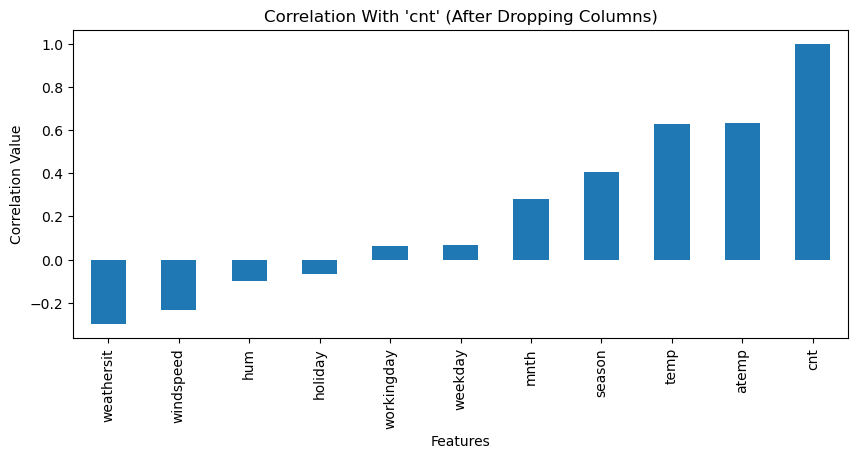

In [11]:
df_dropped = df.drop(columns=columns_to_drop)
plt.figure(figsize=(10, 4))
df_dropped.corr()['cnt'].sort_values().plot(kind='bar')
plt.title("Correlation With 'cnt' (After Dropping Columns)")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.show()

In [12]:
df_cleaned = df.drop(columns=columns_to_drop)

In [13]:
numeric_cols = df_cleaned.select_dtypes(include=['int64','float64']).columns

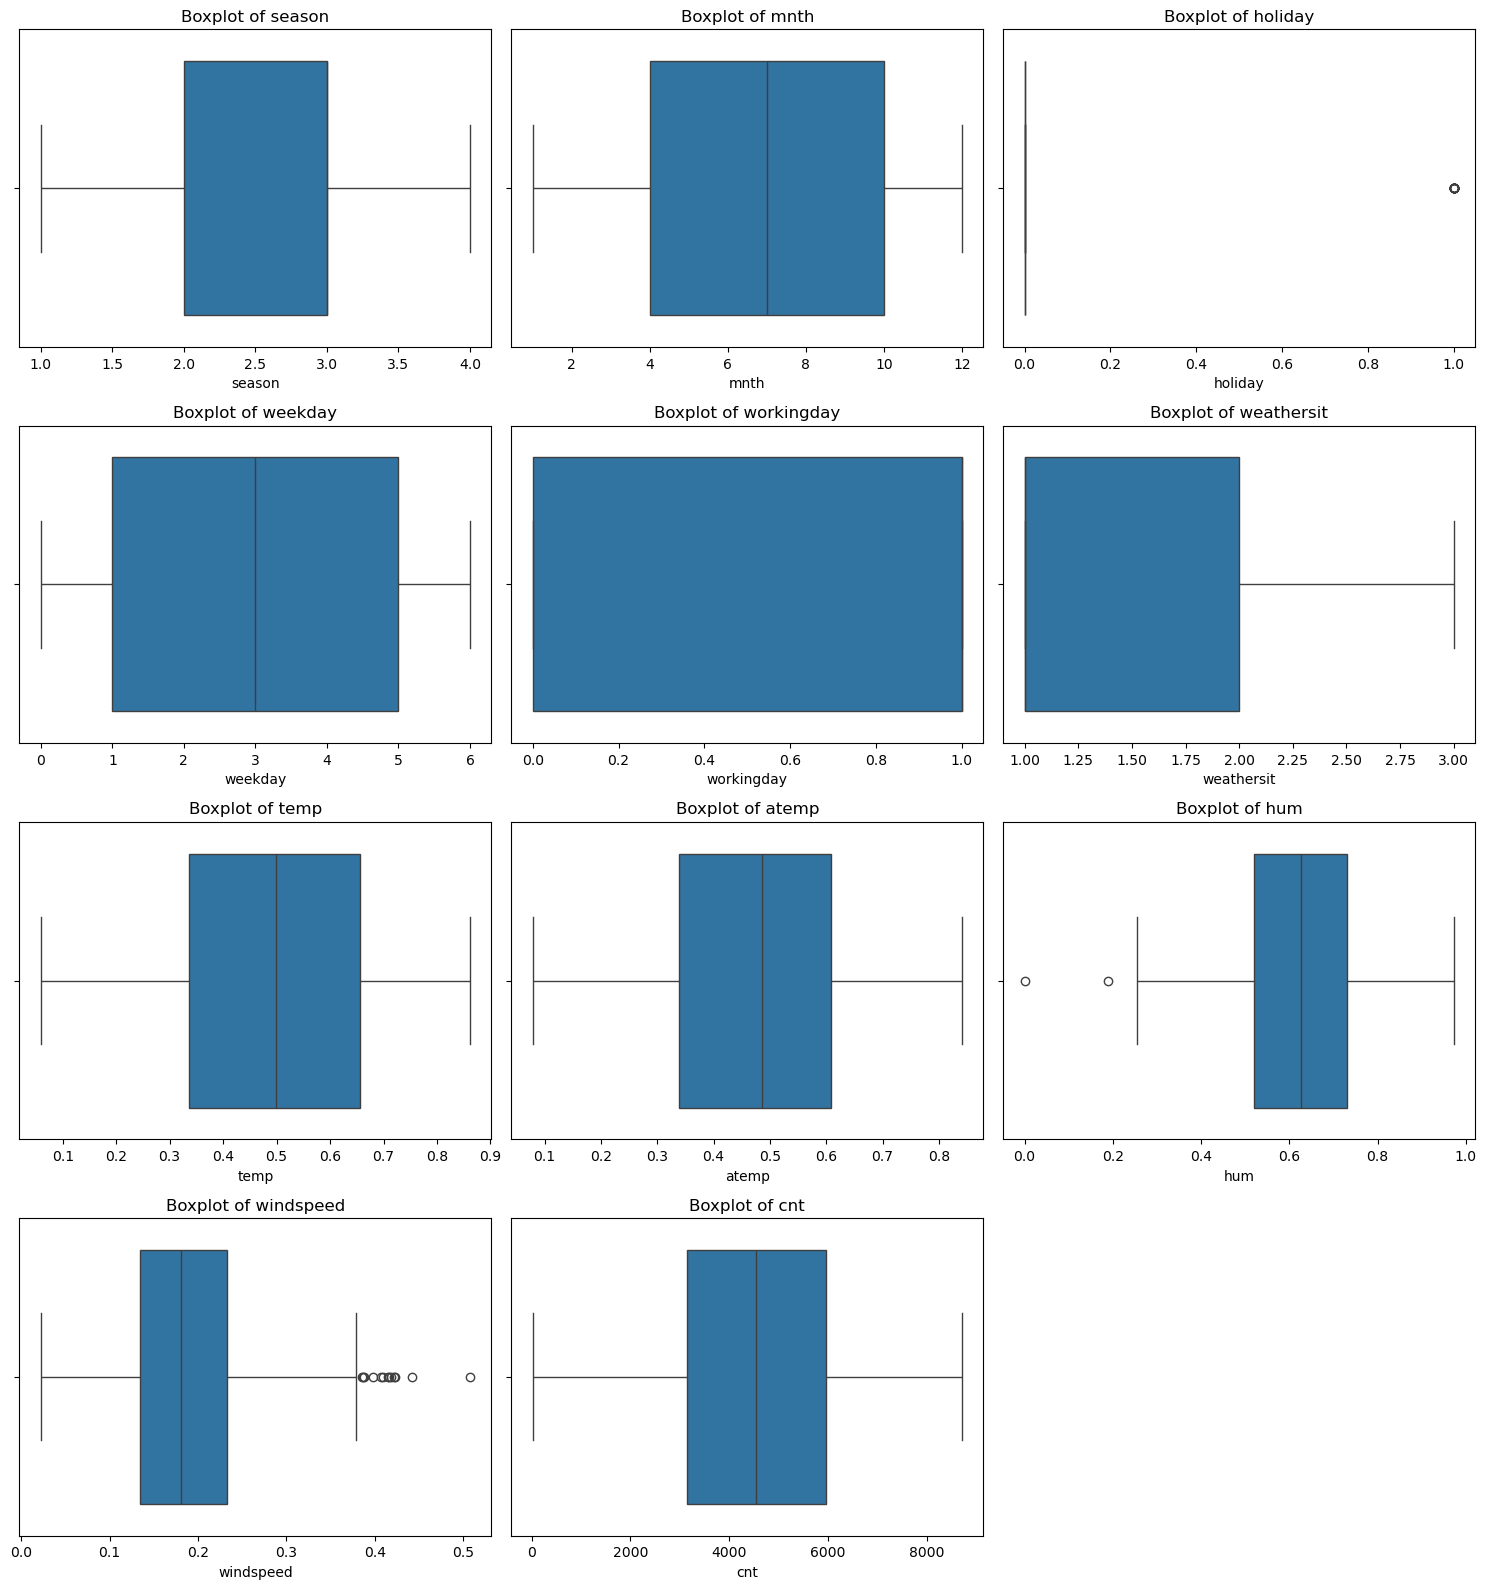

In [14]:
numeric_cols = df_cleaned.select_dtypes(include=['int64','float64']).columns

num_plots = len(numeric_cols)
cols = 3
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()